<a href="https://colab.research.google.com/github/mrigankapaul-dhubri/Mriganka-Covid-EDA/blob/main/MKTA/MKTA_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Loading the file into the google colab environment.
from google.colab import files
uploaded = files.upload()

Saving purchases.csv to purchases.csv


In [2]:
# Importing the libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv("purchases.csv")

In [4]:
df.head()

,customer_id,purchase_amount,date_of_purchase,present_day,days_since
0,760,25.0,06-11-2009,01-01-2016,2247
1,860,50.0,28-09-2012,01-01-2016,1190
2,1200,100.0,25-10-2005,01-01-2016,3720
3,1420,50.0,09-07-2009,01-01-2016,2367
4,1940,70.0,25-01-2013,01-01-2016,1071


In [5]:
data = df.copy()

In [6]:
data = data.drop(["date_of_purchase", "present_day"], axis = 1)

In [7]:
data.head()

,customer_id,purchase_amount,days_since
0,760,25.0,2247
1,860,50.0,1190
2,1200,100.0,3720
3,1420,50.0,2367
4,1940,70.0,1071


In [8]:
data["customer_id"] = data["customer_id"].astype(str)

In [9]:
data.describe()

,purchase_amount,days_since
count,51243.000000,51243.000000
mean,62.337195,1631.939309
std,156.606801,1061.076889
min,5.000000,1.000000
25%,25.000000,733.000000
50%,30.000000,1500.000000
75%,60.000000,2540.000000
max,4500.000000,4016.000000


In [10]:
customers = data.copy()

In [11]:
d1 = data.groupby(['customer_id'], as_index = False)['purchase_amount'].mean()

In [12]:
d1 = d1.rename(columns={"purchase_amount":"amount"})

In [13]:
d1["amount"] = np.round(d1["amount"],2)

In [14]:
d1.head(10)

,customer_id,amount
0,10,30.00
1,1000,22.50
2,100000,35.00
3,100010,27.86
4,100020,30.00
5,100030,20.00
6,100040,20.00
7,100050,20.00
8,100060,20.00
9,100070,21.00


In [15]:
d2 = data.groupby(['customer_id'], as_index = False)['days_since'].min()

In [16]:
d2 = d2.rename(columns={"days_since":"recency"})

In [17]:
d2.head(10)

,customer_id,recency
0,10,3829
1,1000,1120
2,100000,2072
3,100010,413
4,100020,2750
5,100030,2750
6,100040,2121
7,100050,2750
8,100060,2750
9,100070,1462


In [18]:
d3 = data.groupby(['customer_id'], as_index = False)['purchase_amount'].count()

In [19]:
d3 = d3.rename(columns={"purchase_amount":"frequency"})

In [20]:
d3.head()

,customer_id,frequency
0,10,1
1,1000,2
2,100000,2
3,100010,7
4,100020,1


In [21]:
customers = pd.merge(d2,d3, left_on = 'customer_id', right_on = 'customer_id' )

In [22]:
customers.head()

,customer_id,recency,frequency
0,10,3829,1
1,1000,1120,2
2,100000,2072,2
3,100010,413,7
4,100020,2750,1


In [23]:
customers = pd.merge(customers,d1, left_on = 'customer_id', right_on = 'customer_id' )

In [24]:
customers.head()

,customer_id,recency,frequency,amount
0,10,3829,1,30.00
1,1000,1120,2,22.50
2,100000,2072,2,35.00
3,100010,413,7,27.86
4,100020,2750,1,30.00


In [25]:
data_new = customers[['recency', 'frequency', 'amount']]

In [26]:
data_new.head()

,recency,frequency,amount
0,3829,1,30.00
1,1120,2,22.50
2,2072,2,35.00
3,413,7,27.86
4,2750,1,30.00


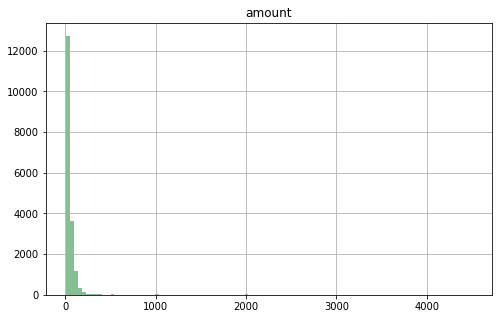

In [27]:
ax = data_new.hist(column='amount', bins=100, grid=True, figsize=(8,5), layout=(1,1), sharex=True, color='#86bf91', zorder=2, rwidth=0.9)

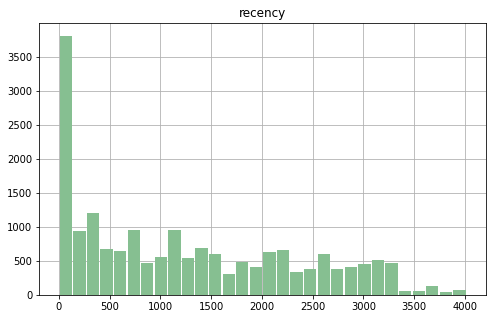

In [28]:
ax = data_new.hist(column='recency', bins=30, grid=True, figsize=(8,5), layout=(1,1), sharex=True, color='#86bf91', zorder=2, rwidth=0.9)

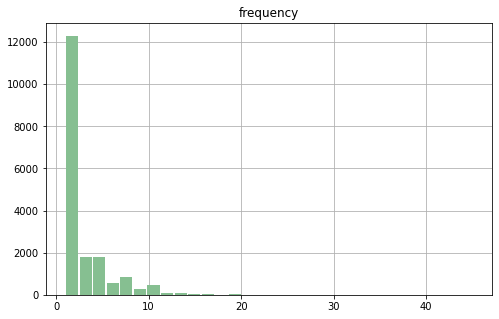

In [29]:
ax = data_new.hist(column='frequency', bins=30, grid=True, figsize=(8,5), layout=(1,1), sharex=True, color='#86bf91', zorder=2, rwidth=0.9)

In [30]:
data_new['amount'] = np.log2(data_new['amount'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
data_new['amount'] = np.round(data_new['amount'],3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
data_new.head()

,recency,frequency,amount
0,3829,1,4.907
1,1120,2,4.492
2,2072,2,5.129
3,413,7,4.800
4,2750,1,4.907


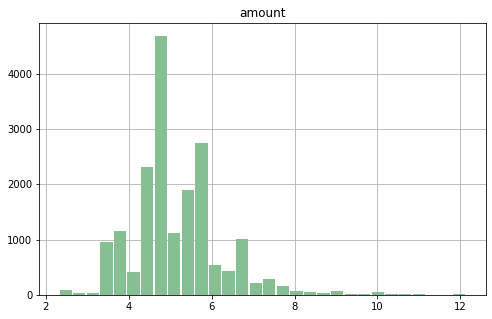

In [33]:
ax = data_new.hist(column='amount', bins=30, grid=True, figsize=(8,5), layout=(1,1), sharex=True, color='#86bf91', zorder=2, rwidth=0.9)

In [34]:
data_new.describe()

,recency,frequency,amount
count,18417.000000,18417.000000,18417.000000
mean,1253.037900,2.782375,5.168063
std,1081.437868,2.936888,1.107400
min,1.000000,1.000000,2.322000
25%,244.000000,1.000000,4.438000
50%,1070.000000,2.000000,4.907000
75%,2130.000000,3.000000,5.644000
max,4014.000000,45.000000,12.136000


In [35]:
scaler = StandardScaler()
data_new_scaled = pd.DataFrame(scaler.fit_transform(data_new),columns=data_new.columns)

In [36]:
data_new_scaled.head()

,recency,frequency,amount
0,2.382043,-0.606909,-0.235750
1,-0.123023,-0.266403,-0.610512
2,0.757311,-0.266403,-0.035275
3,-0.776800,1.436125,-0.332376
4,1.384271,-0.606909,-0.235750


In [37]:
from sklearn.cluster import KMeans

In [38]:
km = KMeans(n_clusters=6)
km

KMeans(n_clusters=6)

In [39]:
y_pred = km.fit_predict(data_new_scaled)
y_pred

array([4, 0, 2, ..., 1, 2, 2], dtype=int32)

In [40]:
data_new_scaled["Cluster_No"] = y_pred
data_new_scaled.head()

,recency,frequency,amount,Cluster_No
0,2.382043,-0.606909,-0.235750,4
1,-0.123023,-0.266403,-0.610512,0
2,0.757311,-0.266403,-0.035275,2
3,-0.776800,1.436125,-0.332376,1
4,1.384271,-0.606909,-0.235750,4


In [41]:
data_new1 = customers[['recency', 'frequency', 'amount']]

In [42]:
customers["Cluster_no"] = y_pred
customers.head()

,customer_id,recency,frequency,amount,Cluster_no
0,10,3829,1,30.00,4
1,1000,1120,2,22.50,0
2,100000,2072,2,35.00,2
3,100010,413,7,27.86,1
4,100020,2750,1,30.00,4


In [43]:
data_new_scaled["Cluster_No"].unique()

array([4, 0, 2, 1, 3, 5], dtype=int32)

In [44]:
from sklearn.decomposition import PCA

In [45]:
pca = PCA(2)

In [46]:
avi_df = pca.fit_transform(data_new_scaled)

In [65]:
kmeans = KMeans(n_clusters= 6, random_state = 101)

In [66]:
label = kmeans.fit_predict(avi_df)

In [67]:
u_labels = np.unique(label)


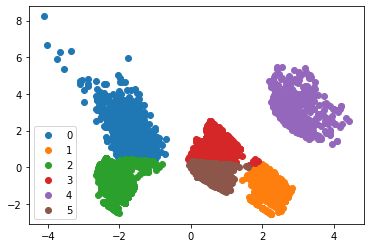

In [63]:
for i in u_labels:
    plt.scatter(avi_df[label == i , 0] , avi_df[label == i , 1] , label = i)
plt.legend()
plt.show()

In [69]:
customers.head()

,customer_id,recency,frequency,amount,Cluster_no
0,10,3829,1,30.00,4
1,1000,1120,2,22.50,0
2,100000,2072,2,35.00,2
3,100010,413,7,27.86,1
4,100020,2750,1,30.00,4


In [70]:
final_rfm_data = customers.copy()

In [71]:
final_rfm_data = final_rfm_data.drop("customer_id", axis = 1)

In [72]:
final_rfm_data.head()

,recency,frequency,amount,Cluster_no
0,3829,1,30.00,4
1,1120,2,22.50,0
2,2072,2,35.00,2
3,413,7,27.86,1
4,2750,1,30.00,4


In [73]:
final_rfm_data = final_rfm_data.groupby("Cluster_no", as_index = False).mean()

In [74]:
final_rfm_data

,Cluster_no,recency,frequency,amount
0,0,699.766971,2.002372,24.304728
1,1,310.182445,9.242647,52.033791
2,2,2397.225110,1.730508,59.533427
3,3,500.159252,2.232430,67.531853
4,4,2613.654365,1.445406,21.242588
5,5,757.342105,3.139098,618.513515


In [56]:
final_rfm_data

,Cluster_no,recency,frequency,amount
0,0,699.766971,2.002372,24.304728
1,1,310.182445,9.242647,52.033791
2,2,2397.225110,1.730508,59.533427
3,3,500.159252,2.232430,67.531853
4,4,2613.654365,1.445406,21.242588
5,5,757.342105,3.139098,618.513515


In [75]:
final_rfm_data.to_excel("Kmeans_RFM22.xlsx")

In [58]:
#customers.to_excel("Kmeans_RFM.xlsx")